In [386]:
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
tmdb_5000_movies = pd.read_csv('tmdb_5000_movies.csv')
tmdb_5000_credits = pd.read_csv('tmdb_5000_credits.csv')

tmdb_5000_movies = tmdb_5000_movies.dropna(
    subset=["budget", "overview", "release_date", "runtime", "tagline"]
)

In [49]:
tmdb_5000_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Simple models with dirty data

In [50]:
temp = tmdb_5000_movies

temp = temp.dropna(subset=['runtime', 'budget'])

X = pd.DataFrame()
X['runtime'] = temp['runtime']
X['budget'] = temp['budget']

y = temp['vote_average']

X.head()


runtime     budget
0    162.0  237000000
1    169.0  300000000
2    148.0  245000000
3    165.0  250000000
4    132.0  260000000

In [51]:
# X.dropna(subset=['runtime'])
# X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 4802
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  4801 non-null   float64
 1   budget   4801 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 112.5 KB


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle = True, random_state = 17)

In [53]:
lr = LinearRegression().fit(X_train, y_train)

In [55]:
mse_lr = mean_squared_error(y_test, lr.predict(X_test))
mae_lr = mean_absolute_error(y_test, lr.predict(X_test))

print('mse_lr: ', mse_lr)
print('mae_lr: ', mae_lr)

mse_lr:  1.09883967392088
mae_lr:  0.7235280318895403


In [56]:
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [57]:
mse_svr = mean_squared_error(y_test, svr.predict(X_test))
mae_svr = mean_absolute_error(y_test, svr.predict(X_test))

print('mse_svr: ', mse_svr)
print('mae_svr: ', mae_svr)

mse_svr:  1.2967053280282157
mae_svr:  0.7871945645547916


In [58]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [59]:
mse_rf = mean_squared_error(y_test, rf.predict(X_test))
mae_rf = mean_absolute_error(y_test, rf.predict(X_test))

print('mse_rf: ', mse_rf)
print('mae_rf: ', mae_rf)

mse_rf:  1.2174863293201321
mae_rf:  0.782058108778687


In [60]:
br = BayesianRidge().fit(X_train, y_train)

In [61]:
mse_br = mean_squared_error(y_test, br.predict(X_test))
mae_br = mean_absolute_error(y_test, br.predict(X_test))

print('mse_br: ', mse_br)
print('mae_br: ', mae_br)

mse_br:  1.099066047614055
mae_br:  0.7236213324690082


## Parsed JSON

In [62]:
final = tmdb_5000_movies

In [64]:
final = final[final['overview'] != '']
final = final[final['title'] != '']
final = final[final['tagline'] != '']

In [69]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [72]:
final = final.dropna(subset = ['tagline']).reset_index(drop = True)

In [ ]:
def json2text(x):
    res = ''
    
    for item in json.loads(x):
        res += item['name'] + ' '

    return res

def json2list(x):
    res = []
    
    for item in json.loads(x):
        res.append(item['name'])

    return res

In [73]:
final['keywords_parsed'] = final['keywords'].apply(lambda x: json2text(x))
final['genres_list'] = final['genres'].apply(lambda x: json2list(x))
final['genres_text'] = final['genres'].apply(lambda x: json2text(x))
final['overview'] = final['overview'].apply(lambda x: x.lower())
final['tagline'] = final['tagline'].apply(lambda x: x.lower())

In [103]:
# X = final['title'] + final['keywords_parsed'] + final['genres_text']
X = final['title'] + final['overview'] + final['tagline']
y = final['vote_average']

In [104]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X).toarray()

In [105]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle = True, random_state = 17)

In [107]:
lr_with_tfidf = LinearRegression().fit(X_train, y_train)

In [108]:
mse_lr = mean_squared_error(y_test, lr_with_tfidf.predict(X_test))
mae_lr = mean_absolute_error(y_test, lr_with_tfidf.predict(X_test))

print('mse_lr: ', mse_lr)
print('mae_lr: ', mae_lr)

mse_lr:  1.2020197100228576
mae_lr:  0.8134203148195469


In [109]:
svr_with_tfidf = SVR(gamma='scale', C=1.0, epsilon=0.2)
svr_with_tfidf.fit(X_train, y_train)

SVR(epsilon=0.2)

In [110]:
mse_svr = mean_squared_error(y_test, svr_with_tfidf.predict(X_test))
mae_svr = mean_absolute_error(y_test, svr_with_tfidf.predict(X_test))

print('mse_svr: ', mse_svr)
print('mae_svr: ', mae_svr)

mse_svr:  0.9808792135373313
mae_svr:  0.7109176885410429


In [111]:
rf_with_tfidf = RandomForestRegressor().fit(X_train, y_train)

In [112]:
mse_rf = mean_squared_error(y_test, rf_with_tfidf.predict(X_test))
mae_rf = mean_absolute_error(y_test, rf_with_tfidf.predict(X_test))

print('mse_rf: ', mse_rf)
print('mae_rf: ', mae_rf)

mse_rf:  1.0181740530303027
mae_rf:  0.7349183501683503


In [115]:
br_with_tfidf = BayesianRidge().fit(X_train, y_train)

In [116]:
mse_br = mean_squared_error(y_test, br_with_tfidf.predict(X_test))
mae_br = mean_absolute_error(y_test, br_with_tfidf.predict(X_test))

print('mse_br: ', mse_br)
print('mae_br: ', mae_br)

mse_br:  0.9691634542624987
mae_br:  0.7108249718934702


## Add embeddings

In [89]:
from gensim.models.keyedvectors import KeyedVectors

In [91]:
wv_embeddings = KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin.gz',
    binary=True
)

In [117]:
final.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'keywords_parsed', 'genres_list', 'genres_text'],
      dtype='object')

In [235]:
X = final['title'] + final['overview'] + final['tagline']
y = final['vote_average']

In [92]:
def string_to_vec(string, embeddings, dim=300):
    words_embedding = [embeddings[word] for word in string.split() if word in embeddings]
    if not words_embedding:
        return np.zeros(dim)
    words_embedding = np.array(words_embedding)
    return words_embedding.mean(axis=0)

In [236]:
X_final = []

for row in X:
    X_final.append(string_to_vec(row, wv_embeddings))

In [120]:
X_final

[array([ 2.47919001e-02,  8.04239884e-02,  4.77701835e-02,  2.33270563e-02,
        -1.22776575e-01,  1.77830290e-02,  4.30210643e-02, -1.00283667e-01,
         7.56719708e-02,  4.77120541e-02,  9.66680609e-03, -8.60653818e-02,
        -2.28474941e-02,  4.69680037e-03, -8.06303471e-02,  5.70431650e-02,
        -3.19010429e-02,  8.65841806e-02,  1.10996794e-02,  6.81849895e-03,
        -5.67002073e-02,  7.09606335e-03, -5.54141104e-02,  1.04232063e-03,
         1.75781250e-02, -5.01825251e-02, -5.10689877e-02,  1.33771628e-01,
         9.96188223e-02,  1.82931088e-02,  1.97441801e-02, -6.70474842e-02,
        -8.46848264e-02,  1.92769375e-02,  1.16439089e-02, -2.73938868e-02,
        -1.42240981e-02,  1.41746886e-02,  2.66905278e-02,  7.80684799e-02,
        -1.20907743e-03, -3.10407374e-02,  7.36287460e-02,  6.09554797e-02,
        -3.43976705e-03, -4.04288881e-02,  1.91243493e-03,  2.89691743e-02,
         4.08063605e-02, -1.82407927e-02, -2.83144992e-02,  3.38803232e-02,
         6.8

In [237]:
np.array(X_final).shape, y.shape

((3959, 300), (3959,))

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=.3, shuffle = True, random_state = 17)

In [123]:
lr_emb = LinearRegression().fit(X_train, y_train)

In [124]:
mse_lr = mean_squared_error(y_test, lr_emb.predict(X_test))
mae_lr = mean_absolute_error(y_test, lr_emb.predict(X_test))

print('mse_lr: ', mse_lr)
print('mae_lr: ', mae_lr)

mse_lr:  1.0895347360767795
mae_lr:  0.7546853859416562


In [239]:
knr_emb = KNeighborsRegressor().fit(X_train, y_train)

In [240]:
mse_knr = mean_squared_error(y_test, knr_emb.predict(X_test))
mae_knr = mean_absolute_error(y_test, knr_emb.predict(X_test))

print('mse_knr: ', mse_knr)
print('mae_knr: ', mae_knr)

mse_knr:  1.1584993265993266
mae_knr:  0.7846632996632997


In [242]:
dtr_emb = DecisionTreeRegressor().fit(X_train, y_train)

In [243]:
mse_dtr = mean_squared_error(y_test, dtr_emb.predict(X_test))
mae_dtr = mean_absolute_error(y_test, dtr_emb.predict(X_test))

print('mse_dtr: ', mse_dtr)
print('mae_dtr: ', mae_dtr)

mse_dtr:  1.9822979797979796
mae_dtr:  1.0147306397306397


In [125]:
svr_emb = SVR(gamma='scale', C=1.0, epsilon=0.2)
svr_emb.fit(X_train, y_train)

SVR(epsilon=0.2)

In [126]:
mse_svr = mean_squared_error(y_test, svr_emb.predict(X_test))
mae_svr = mean_absolute_error(y_test, svr_emb.predict(X_test))

print('mse_svr: ', mse_svr)
print('mae_svr: ', mae_svr)

mse_svr:  0.9786055146411029
mae_svr:  0.7057912957180118


In [127]:
rf_emb = RandomForestRegressor().fit(X_train, y_train)

In [128]:
mse_rf = mean_squared_error(y_test, rf_emb.predict(X_test))
mae_rf = mean_absolute_error(y_test, rf_emb.predict(X_test))

print('mse_rf: ', mse_rf)
print('mae_rf: ', mae_rf)

mse_rf:  0.974114308080808
mae_rf:  0.7196885521885522


In [129]:
br_emb = BayesianRidge().fit(X_train, y_train)

In [130]:
mse_br = mean_squared_error(y_test, br_emb.predict(X_test))
mae_br = mean_absolute_error(y_test, br_emb.predict(X_test))

print('mse_br: ', mse_br)
print('mae_br: ', mae_br)

mse_br:  0.9791264240380277
mae_br:  0.7090815082140425


## Additional data preparing

In [259]:
df = final

In [260]:
df = df.dropna(subset = ['overview', 'release_date', 'runtime', 'tagline', 'budget'])

In [261]:
features = ['vote_average', 'runtime', 'budget']

for feature in features:
    df = df[(df[feature] != 0)]

features_str = ['overview', 'tagline', 'title']

for feature in features_str:
    df = df[(df[feature] != '')]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 0 to 3957
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3362 non-null   int64  
 1   genres                3362 non-null   object 
 2   homepage              1340 non-null   object 
 3   id                    3362 non-null   int64  
 4   keywords              3362 non-null   object 
 5   original_language     3362 non-null   object 
 6   original_title        3362 non-null   object 
 7   overview              3362 non-null   object 
 8   popularity            3362 non-null   float64
 9   production_companies  3362 non-null   object 
 10  production_countries  3362 non-null   object 
 11  release_date          3362 non-null   object 
 12  revenue               3362 non-null   int64  
 13  runtime               3362 non-null   float64
 14  spoken_languages      3362 non-null   object 
 15  status               

In [262]:
def transform_budget(budget):
    if (budget < 100):
        return budget * 1000000

    return budget

In [263]:
df['budget'] = df['budget'].apply(transform_budget)

In [264]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [265]:
df.sort_values(by = 'vote_average').head(5)

budget                                             genres  \
3951   13000000                     [{"id": 27, "name": "Horror"}]   
1057   65000000  [{"id": 16, "name": "Animation"}, {"id": 28, "...   
3450    3000000                   [{"id": 53, "name": "Thriller"}]   
2252   17000000                  [{"id": 12, "name": "Adventure"}]   
1564  100000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                               homepage      id  \
3951                      http://tincanmanthemovie.com/  157185   
1057  http://www.thresholdanimationstudios.com/video...  116977   
3450                                                NaN  342502   
2252                                                NaN   58048   
1564                                                NaN   14164   

                                               keywords original_language  \
3951           [{"id": 14903, "name": "home invasion"}]                en   
1057  [{"id": 1545, "name": "supermarket"}, {"id": 1...                en   
3450  [{"id": 2808, "name": "russian"}, {"id": 15970...                en   
2252                                                 []                en   
1564  [{"id": 3436, "name": "karate"}, {"id": 9715, ...                en   

            original_title                                           overview  \
3951           Tin Can Man  recently dumped by his girlfirend for another ...   
1057            Foodfight!  dex, a superdog sleuth, is the law of the land...   
3450               AWOL-72  an awol marine in possession of secret governm...   
2252     Shanghai Surprise  glendon wasey is a fortune hunter looking for ...   
1564  Dragonball Evolution  the young warrior son goku sets out on a quest...   

      popularity                               production_companies  ...  \
3951    0.332679  [{"name": "Park Films", "id": 21871}, {"name":...  ...   
1057    5.258726  [{"name": "Threshold Entertainment", "id": 417...  ...   
3450    1.141463  [{"name": "Triumphant Entertainment", "id": 60...  ...   
2252    0.138564  [{"name": "HandMade Films", "id": 20076}, {"na...  ...   
1564   21.677732  [{"name": "Ingenious Film Partners", "id": 289...  ...   

     runtime                                   spoken_languages    status  \
3951    84.0           [{"iso_639_1": "en", "name": "English"}]  Released   
1057    87.0           [{"iso_639_1": "en", "name": "English"}]  Released   
3450    79.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2252    97.0           [{"iso_639_1": "en", "name": "English"}]  Released   
1564    85.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                                               tagline                 title  \
3951                   everything you've heard is true           Tin Can Man   
1057                       when good food... goes bad!            Foodfight!   
3450            72 hours on the clock. starting now...               AWOL-72   
2252  a romantic adventure for the dangerous at heart.     Shanghai Surprise   
1564                         the legend comes to life.  Dragonball Evolution   

     vote_average vote_count  \
3951          2.0          1   
1057          2.3         28   
3450          2.8         10   
2252          2.9         15   
1564          2.9        462   

                                        keywords_parsed  \
3951                                     home invasion    
1057  supermarket fight product placement computer a...   
3450             russian getaway lapd awol special ops    
2252                                                      
1564  karate superhero revenge dragon duringcreditss...   

                                            genres_list  \
3951                                           [Horror]   
1057                [Animation, Action, Comedy, Family]   
3450                                         [Thriller]   
2252                                        [Adven

In [266]:
df = df.join(pd.get_dummies(df['genres_list'].apply(pd.Series).stack()).sum(level=0))

In [268]:
df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  in the 22nd century, a paraplegic marine is di...  150.437577   
1  captain barbossa, long believed to be dead, ha...  139.082615   
2  a cryptic message from bond’s past sends him o...  107.376788   
3  following the death of district attorney harve...  112.312950   
4  john carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... History Horror  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...     0.0    0.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...     0.0    0.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...     0.0    0.0   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...     0.0    0.0   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...     0.0    0.0   

   Music  Mystery Romance Science Fiction TV Movie Thriller  War  Western  
0    0.0      0.0     0.0             1.0      0.0      0.0  0.0      0.0  
1    0.0      0.0     0.0             0.0      0.0      0.0  0.0      0.0  
2    0.0      0.0     0.0             0.0      0.0      0.0  0.0      0.0  
3    0.0      0.0     0.0             0.0      0.0      1.0  0.0      0.0  
4    0.0      0.0     0.0             1.0      0.0      0.0  0.0      0.0  

[5 rows x 43 columns]

In [143]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'keywords_parsed', 'genres_list', 'genres_text', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [267]:
df.dropna(subset = ['Horror'], axis = 0, inplace = True)

## Final

In [145]:
final_df = df.drop(['id', 'genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'spoken_languages', 'status', 'tagline', 'title', 'vote_count', 'keywords_parsed', 'genres_list', 'genres_text'], axis = 1)

In [146]:
final_df.columns

Index(['budget', 'runtime', 'vote_average', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [147]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3262 entries, 0 to 3956
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           3262 non-null   int64  
 1   runtime          3262 non-null   float64
 2   vote_average     3262 non-null   float64
 3   Action           3262 non-null   uint8  
 4   Adventure        3262 non-null   uint8  
 5   Animation        3262 non-null   uint8  
 6   Comedy           3262 non-null   uint8  
 7   Crime            3262 non-null   uint8  
 8   Documentary      3262 non-null   uint8  
 9   Drama            3262 non-null   uint8  
 10  Family           3262 non-null   uint8  
 11  Fantasy          3262 non-null   uint8  
 12  Foreign          3262 non-null   uint8  
 13  History          3262 non-null   uint8  
 14  Horror           3262 non-null   uint8  
 15  Music            3262 non-null   uint8  
 16  Mystery          3262 non-null   uint8  
 17  Romance       

In [246]:
X_prep = df['title'] + df['overview'] + df['tagline']
y = df['vote_average']

In [247]:
X_final_emb = []

for row in X_prep:
    X_final_emb.append(string_to_vec(row, wv_embeddings))

In [248]:
np.array(X_final_emb).shape, y.shape, final_df.shape

((3262, 300), (3262,), (3262, 23))

In [249]:
X_fin = np.concatenate((X_final_emb, final_df.drop('vote_average', axis = 1)),axis=1)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=.3, shuffle = True, random_state = 17)

In [162]:
final_df.columns

Index(['budget', 'runtime', 'vote_average', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [191]:
import xgboost

In [195]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [196]:
mse_xgb = mean_squared_error(y_test, xgb.predict(X_test))
mae_xgb = mean_absolute_error(y_test, xgb.predict(X_test))

print('mse_xgb: ', mse_xgb)
print('mae_xgb: ', mae_xgb)

mse_xgb:  0.6136551602855912
mae_xgb:  0.6011309232117572


In [399]:
r2_score_xgb_final = r2_score(y_test, xgb.predict(X_test))

print('r2_score:', r2_score_xgb_final)

r2_score: 0.2558895726863899


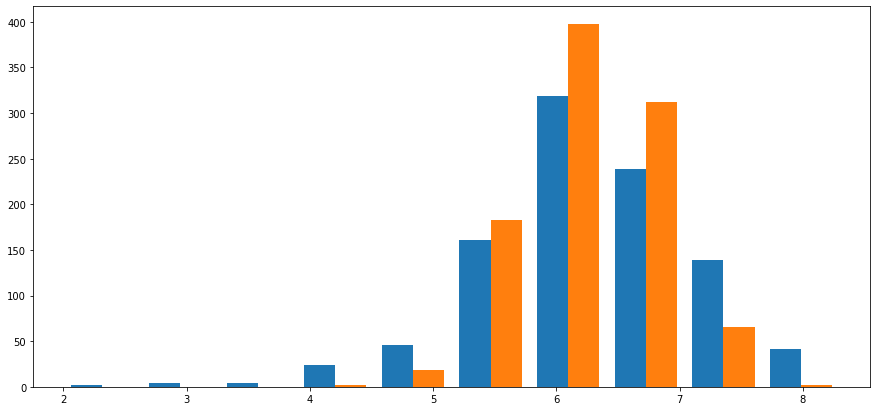

In [197]:
plt.figure(figsize = (15,7))
plt.hist([y_test, xgb.predict(X_test)])
plt.show()

In [272]:
r = Ridge().fit(X_train, y_train)

In [273]:
mse_r = mean_squared_error(y_test, r.predict(X_test))
mae_r = mean_absolute_error(y_test, r.predict(X_test))

print('mse_r: ', mse_r)
print('mae_r: ', mae_r)

mse_r:  0.5669369871938849
mae_r:  0.5706654584862982


In [398]:
r2_score_r_final = r2_score(y_test, r.predict(X_test))

print('r2_score:', r2_score_r_final)

r2_score: 0.26333342901340107


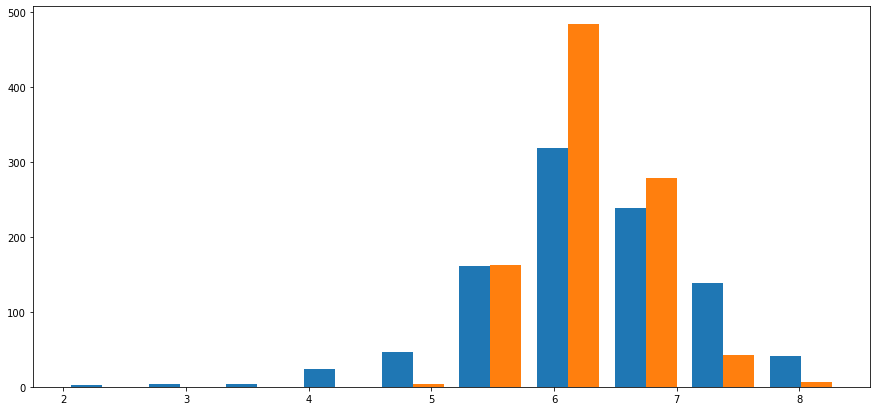

In [274]:
plt.figure(figsize = (15,7))
plt.hist([y_test, r.predict(X_test)])
plt.show()

In [163]:
lr_final = LinearRegression().fit(X_train, y_train)

In [164]:
mse_lr = mean_squared_error(y_test, lr_final.predict(X_test))
mae_lr = mean_absolute_error(y_test, lr_final.predict(X_test))

print('mse_lr: ', mse_lr)
print('mae_lr: ', mae_lr)

mse_lr:  0.6544643511853341
mae_lr:  0.6210619399528703


In [395]:
r2_score_lr_final = r2_score(y_test, lr_final.predict(X_test))

print('r2_score:', r2_score_lr_final)

r2_score: 0.16205955013714424


In [165]:
svr_final = SVR(gamma='scale', C=1.0, epsilon=0.2)
svr_final.fit(X_train, y_train)

SVR(epsilon=0.2)

In [166]:
mse_svr = mean_squared_error(y_test, svr_final.predict(X_test))
mae_svr = mean_absolute_error(y_test, svr_final.predict(X_test))

print('mse_svr: ', mse_svr)
print('mae_svr: ', mae_svr)

mse_svr:  0.7658634234245506
mae_svr:  0.672244548965339


In [396]:
r2_score_svr_final = r2_score(y_test, svr_final.predict(X_test))

print('r2_score:', r2_score_svr_final)

r2_score: 0.006457780871724106


In [174]:
rf_final = RandomForestRegressor(n_estimators = 100, criterion = 'mae').fit(X_train, y_train)

In [175]:
mse_rf = mean_squared_error(y_test, rf_final.predict(X_test))
mae_rf = mean_absolute_error(y_test, rf_final.predict(X_test))

print('mse_rf: ', mse_rf)
print('mae_rf: ', mae_rf)

mse_rf:  0.5619863003064353
mae_rf:  0.5762982635342188


In [169]:
br_final = BayesianRidge().fit(X_train, y_train)

In [170]:
mse_br = mean_squared_error(y_test, br_final.predict(X_test))
mae_br = mean_absolute_error(y_test, br_final.predict(X_test))

print('mse_br: ', mse_br)
print('mae_br: ', mae_br)

mse_br:  0.5587403953572154
mae_br:  0.5656469791694445


In [171]:
import matplotlib.pyplot as plt

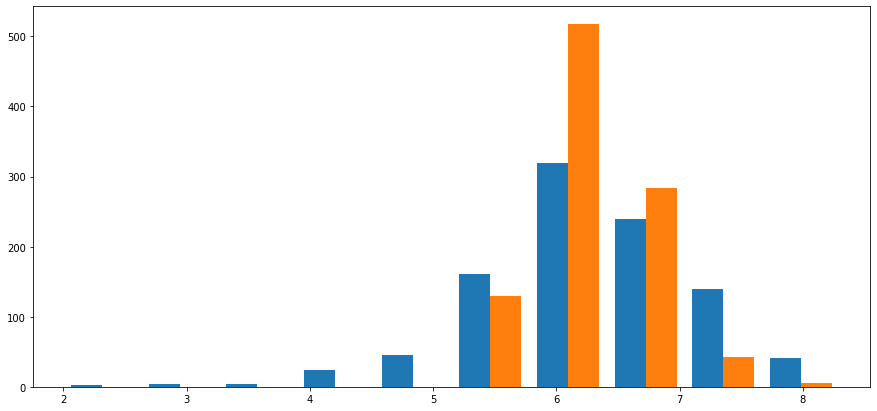

In [172]:
plt.figure(figsize = (15,7))
plt.hist([y_test, br_final.predict(X_test)])
plt.show()

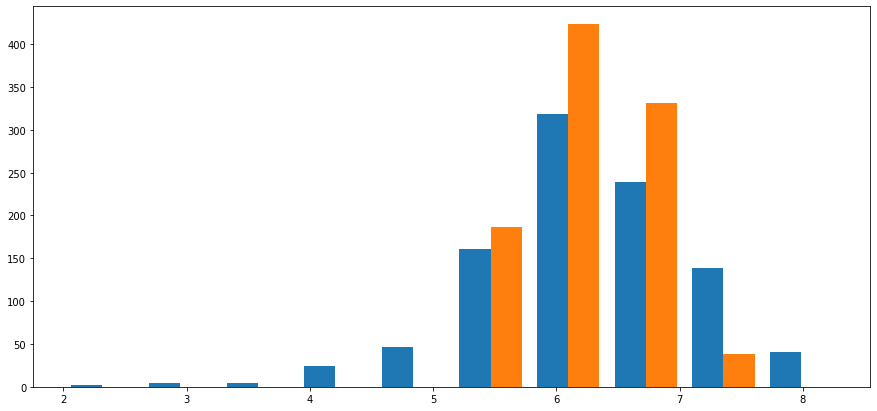

In [173]:
plt.figure(figsize = (15,7))
plt.hist([y_test, rf_final.predict(X_test)])
plt.show()

In [255]:
final_df.sort_values(by = 'vote_average').head(5)

budget  runtime  vote_average  Action  Adventure  Animation  Comedy  \
3951   13000000     84.0           2.0       0          0          0       0   
1057   65000000     87.0           2.3       1          0          1       1   
3450    3000000     79.0           2.8       0          0          0       0   
1564  100000000     85.0           2.9       1          1          0       0   
2611   12000000     90.0           3.0       0          0          0       1   

      Crime  Documentary  Drama  ...  History  Horror  Music  Mystery  \
3951      0            0      0  ...        0       1      0        0   
1057      0            0      0  ...        0       0      0        0   
3450      0            0      0  ...        0       0      0        0   
1564      0            0      0  ...        0       0      0        0   
2611      0            0      0  ...        0       0      0        0   

      Romance  Science Fiction  TV Movie  Thriller  War  Western  
3951        0                0         0         0    0        0  
1057        0                0         0         0    0        0  
3450        0                0         0         1    0        0  
1564        0                1         0         1    0        0  
2611        1                0         0         0    0        0  

[5 rows x 23 columns]

## Ensemble

In [407]:
def get_models():
    models = list()
    # models.append(('lr', LinearRegression()))
    models.append(('br', BayesianRidge()))
    models.append(('lr', LinearRegression()))
    # models.append(('xgb', xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)))
    models.append(('svr', SVR(gamma='scale', C=1.0, epsilon=0.2)))
    # models.append(('r', Ridge()))
    models.append(('rf', RandomForestRegressor()))
    # models.append(('br', BayesianRidge()))
    return models

In [370]:
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	meta_X = list()
	for name, model in models:
		model.fit(X_train, y_train)
		yhat = model.predict(X_val)
		yhat = yhat.reshape(len(yhat), 1)
		meta_X.append(yhat)
	meta_X = np.hstack(meta_X)
	blender = BayesianRidge()
	blender.fit(meta_X, y_val)
	return blender
 
def predict_ensemble(models, blender, X_test):
	meta_X = list()
	for name, model in models:
		yhat = model.predict(X_test)
		yhat = yhat.reshape(len(yhat), 1)
		meta_X.append(yhat)
	meta_X = np.hstack(meta_X)
	return blender.predict(meta_X)

In [408]:
models = get_models()

In [327]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=.3, shuffle = True, random_state = 17)

# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X_fin, y, test_size = .33, shuffle = True, random_state = 17)

# split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = .33, shuffle = True, random_state = 17)

# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))

Train: (1463, 322), Val: (722, 322), Test: (1077, 322)


In [409]:
# blender = fit_ensemble(models, X_train, X_test, y_train, y_test)
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)

In [410]:
yhat = predict_ensemble(models, blender, X_test)

In [411]:
mse_ens_xgb = mean_squared_error(y_test, yhat)
mae_ens_xgb = mean_absolute_error(y_test, yhat)

print('mse_br: ', mse_ens_xgb)
print('mae_br: ', mae_ens_xgb)

mse_br:  0.5470752959809094
mae_br:  0.5629277575497528


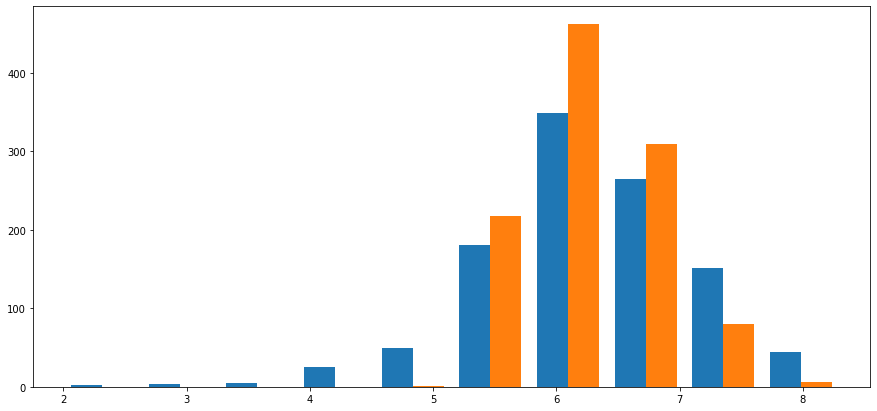

In [374]:
plt.figure(figsize = (15,7))
plt.hist([y_test, yhat])
plt.show()

In [187]:
mse_ens = mean_squared_error(y_test, yhat)
mae_ens = mean_absolute_error(y_test, yhat)

print('mse_br: ', mse_ens)
print('mae_br: ', mae_ens)

mse_br:  0.53969473023727
mae_br:  0.555303038317939


In [190]:
mae_ens/np.mean(final_df['vote_average'])

0.0884528075997557

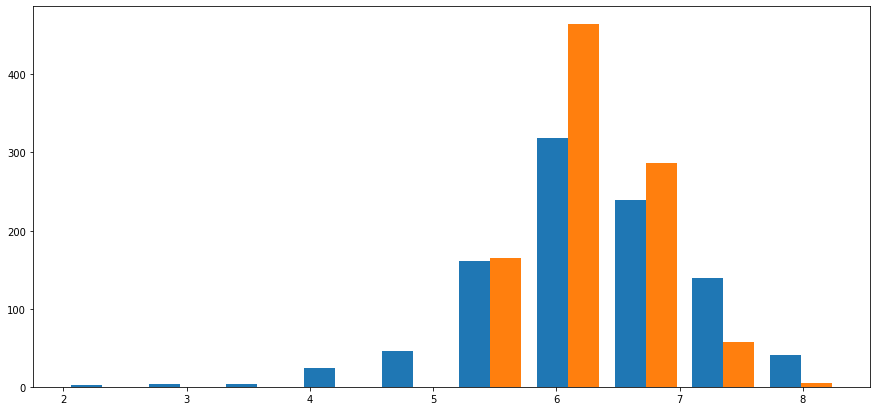

In [188]:
plt.figure(figsize = (15,7))
plt.hist([y_test, yhat])
plt.show()

In [181]:
mean_absolute_error(y_test, yhat)

0.5574671174614193

In [182]:
mean_squared_error(y_test, yhat)

0.544585286107847

######################################